In [578]:
import os
import csv
import numpy as np
import json
from os import path



In [579]:
approaches_reference = {
    'approach01' : {
        'name' : 'NStPc',
        'description' : "No additional path, heatmap simple threshold elimination, pre-computed path on full graph"
    },
    'approach02' : {
        'name' : 'NStSg',
        'description' : "No additional path, heatmap simple threshold elimination, subgraph approach"
    },
    'approach03': {
        'name' : 'NStSgPc',
        'description' : 'No additional paths, simple threshold elimination, precomputed path on subgraph' 
    },
    'approach04' : {
        'name' : 'AStPc',
        'description' : "Additional path, heatmap simple threshold elimination, pre-computed path on full graph"
    },
    'approach05' : {
        'name' : 'AStSg',
        'description' : "Additional path, heatmap simple threshold elimination, subgraph approach"
    },
    'approach06': {
        'name' : 'AStSgPc',
        'description' : 'Additional paths, simple threshold elimination, precomputed path on subgraph' 
    },
    'approach07' : {
        'name' : 'NStSgC',
        'description' : "No Additional path, heatmap simple threshold elimination, subgraph approach with corridor"
    },
    'approach08' : {
        'name' : 'NStSgD',
        'description' : "No Additional path, heatmap simple threshold elimination, subgraph approach with diamond"
    },
    'approach09' : {
        'name' : 'NStSgCD',
        'description' : " No Additional path, heatmap simple threshold elimination, subgraph approach with diamond and corridor"
    },
    'approach10' : {
        'name' : 'AStSgCD',
        'description' : " No Additional path, heatmap simple threshold elimination, subgraph approach with diamond and corridor"
    },
    'approach11' : {
        'name' : 'NShPc',
        'description' : "No additional path, summed heatmap elimination, pre-computed path on full graph"
    },
    'approach12' : {
        'name' : 'NShSg',
        'description' : "No additional path, summed heatmap elimination, subgraph approach"
    },
    'approach13': {
        'name' : 'NShSgPc',
        'description' : 'No additional paths, summed heatmap elimination, precomputed path on subgraph' 
    },
    'approach14' : {
        'name' : 'AShPc',
        'description' : "Additional path, summed heatmap elimination, subgraph approach"
    },
    'approach15' : {
        'name' : 'NShPcCD',
        'description' : "Additional path, summed heatmap elimination, subgraph approach with diamond and corridor"
    },
    'base_mapf': {
        'name' : 'MAPF',
        'description' : 'Classical MAPF approach'
    }
}

In [580]:

print('\\begin{table}[H]')
print('\\begin{center}')
print('\\caption{Table of the approaches reference name and their description}')
print('\\label{tbl:approach_ref_and_desc}')
print('\\begin{tabular}{ | p{2cm} | p{8cm}|  } ')

print('\t\\hline')
print('\tName & Value \\\\')
print('\t\\hline')

for approach in approaches_reference:
    print('\t\\hline')
    print("\t\\textbf{" +approaches_reference[approach]['name'] + "} & " + f"{approaches_reference[approach]['description']} \\\\")
print('\t\\hline')
print('\\end{tabular}')

print('\\end{center}')
print('\\end{table}')


\begin{table}[H]
\begin{center}
\caption{Table of the approaches reference name and their description}
\label{tbl:approach_ref_and_desc}
\begin{tabular}{ | p{2cm} | p{8cm}|  } 
	\hline
	Name & Value \\
	\hline
	\hline
	\textbf{NStPc} & No additional path, heatmap simple threshold elimination, pre-computed path on full graph \\
	\hline
	\textbf{NStSg} & No additional path, heatmap simple threshold elimination, subgraph approach \\
	\hline
	\textbf{NStSgPc} & No additional paths, simple threshold elimination, precomputed path on subgraph \\
	\hline
	\textbf{AStPc} & Additional path, heatmap simple threshold elimination, pre-computed path on full graph \\
	\hline
	\textbf{AStSg} & Additional path, heatmap simple threshold elimination, subgraph approach \\
	\hline
	\textbf{AStSgPc} & Additional paths, simple threshold elimination, precomputed path on subgraph \\
	\hline
	\textbf{NStSgC} & No Additional path, heatmap simple threshold elimination, subgraph approach with corridor \\
	\hline
	

In [581]:
benchmarks_paths = 'benchmarks_result'
csvs = [path.join(benchmarks_paths, file) for file in os.listdir(
    benchmarks_paths) if path.isfile(path.join(benchmarks_paths, file))]



In [582]:
approaches = {}
instances = set()
header = None
np.random.shuffle(csvs)
for c in csvs:
    if 'instance' in c :
        continue
    with open(c) as csv_file:
        content = csv.reader(csv_file,delimiter=';')
        rows = [row for row in content]
        header = rows[0]

    approach_name = c[c.index('-')+1:c.index('.')]
    instance_name = c[c.index('/')+1:c.index('-')]
    instances.add(instance_name)
    
    if not approach_name in approaches:
        approaches[approach_name] = {instance_name:rows[1:]}
    else:
        approaches[approach_name][instance_name] = rows[1:]

In [583]:
for approach in approaches:
    total_time = np.array([])
    for instance in approaches[approach]:
        sub_total = 0
        is_sat = True
        for step in approaches[approach][instance]:

            if step[4] != 'True':
                is_sat = False
            else:
                sub_total += float(step[1])
            
            if step[0] == 'partial_solving':
                break
        if is_sat:
            total_time = np.append(total_time, sub_total)

    print(f'Approach {approach}: sum: {total_time.sum()}, mean: {total_time.mean()}, median: {np.median(total_time)}')

Approach approach01: sum: 524.7615966796875, mean: 34.9841064453125, median: 13.899969339370728
Approach approach05: sum: 187.30633783340454, mean: 9.858228307021292, median: 6.503636598587036
Approach approach13: sum: 217.1787931919098, mean: 13.573674574494362, median: 7.3106138706207275
Approach base_mapf: sum: 941.4166352748871, mean: 47.07083176374435, median: 10.697507977485657
Approach approach04: sum: 529.6492638587952, mean: 37.832090275628225, median: 14.810846090316772
Approach approach09: sum: 240.36804151535034, mean: 12.018402075767517, median: 6.127305030822754
Approach approach11: sum: 538.3994996547699, mean: 35.89329997698466, median: 14.129933595657349
Approach approach15: sum: 250.4105818271637, mean: 14.730034225127277, median: 7.037921190261841
Approach approach03: sum: 214.62753462791443, mean: 12.625149095759673, median: 6.1449408531188965
Approach approach02: sum: 235.40209460258484, mean: 11.770104730129242, median: 5.869832515716553
Approach approach14: sum: 

In [584]:
n_additional_horizon = 5
def table_instance(instances:list[any],instance_name):


    # print(instance_name, len(instances.keys()))
    
    ret = f"{instance_name} &"
    total_time = 0
    for instance in instances:
        for step in instances[instance]:
            # print(step)
            total_time += float(step[1])
            if step[0] == 'partial_solving':
                break
            
    ret += " {0:0.2f} &".format(total_time)
    
    n_sat = 0
    for instance in instances:
        for step in instances[instance]:
            if step[0] == 'base_mapf':
                n_sat+=1
            if step[0] == 'partial_solving':
                # print(instance_name, type(step[4]), step[4])
                if step[4] == "True":
                    n_sat += 1
    
    ret += f" {n_sat} &"
    
    ret += " \cellcolor{lightgrey} "
    
    
    solving_proportion = {i:[] for i in range(0,4)}

    nagent = 0
    for instance in instances:
        solving_id = 0

        for step in instances[instance]:
            additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
            
            
            if step[0] == 'base_mapf':
                for i in range(4):
                    solving_proportion[i].append(1)
            else:
                if step[0] == 'base_ipf':
                    nagent = additional_data['nagent']
                
                if 'partial_solving' == step[0]:
                    solving_proportion[solving_id].append(additional_data['ngoal_reached']/nagent)
                    solving_id += 1
                    
                if 'partial_solving_additional_horizon' == step[0]:
                    solving_proportion[solving_id].append(additional_data['ngoal_reached']/nagent)
                    solving_id += 1
    
    
    for s in solving_proportion:
        solving_proportion[s] += [1 for _ in range(len(instances)-len(solving_proportion[s])) ]
        ret += "& {0:0.2f} ".format(float("{0:0.2f}".format(np.mean(solving_proportion[s]))))
    ret += ' \\\\'

        
    

    # print(solving_proportion)
    return ret

In [585]:
print("\\begin{table}[H]")
print("\\begin{center}")
print("\\begin{tabular}{@{}llllllll@{}}")
print("\\toprule")
print(" &  &  & \multicolumn{5}{c}{\% Agent Completed} \\\\ \\cmidrule(l){4-8} ")
print("\multirow{-2}{*}{Approach} & \multirow{-2}{*}{Total Time} & \multirow{-2}{*}{\# SAT} & \multicolumn{1}{l|}{Horizon} & \multicolumn{1}{c}{0} & \multicolumn{1}{c}{1} & \multicolumn{1}{c}{3} & \multicolumn{1}{c}{5} \\\\ \midrule")

for approach in approaches:
    print(table_instance(approaches[approach], approaches_reference[approach]['name']))


print('\\end{tabular}')
print('\\end{center}')
print('\\end{table}')




\begin{table}[H]
\begin{center}
\begin{tabular}{@{}llllllll@{}}
\toprule
 &  &  & \multicolumn{5}{c}{\% Agent Completed} \\ \cmidrule(l){4-8} 
\multirow{-2}{*}{Approach} & \multirow{-2}{*}{Total Time} & \multirow{-2}{*}{\# SAT} & \multicolumn{1}{l|}{Horizon} & \multicolumn{1}{c}{0} & \multicolumn{1}{c}{1} & \multicolumn{1}{c}{3} & \multicolumn{1}{c}{5} \\ \midrule
NStPc & 544.96 & 15 & \cellcolor{lightgrey} & 0.83 & 0.84 & 0.85 & 0.85  \\
AStSg & 187.31 & 19 & \cellcolor{lightgrey} & 0.99 & 0.99 & 1.00 & 1.00  \\
NShSgPc & 235.05 & 16 & \cellcolor{lightgrey} & 0.74 & 0.76 & 0.76 & 0.78  \\
MAPF & 941.42 & 20 & \cellcolor{lightgrey} & 1.00 & 1.00 & 1.00 & 1.00  \\
AStPc & 557.29 & 14 & \cellcolor{lightgrey} & 0.76 & 0.76 & 0.76 & 0.77  \\
NStSgCD & 240.37 & 20 & \cellcolor{lightgrey} & 0.99 & 0.99 & 0.99 & 0.99  \\
NShPc & 556.84 & 15 & \cellcolor{lightgrey} & 0.85 & 0.86 & 0.86 & 0.86  \\
NShPcCD & 270.90 & 17 & \cellcolor{lightgrey} & 0.80 & 0.80 & 0.81 & 0.81  \\
NStSgPc & 228.87 & 1

In [586]:
approach_solvability = {}
for approach in approaches :
    if approach != 'base_mapf':
        approach_solvability[approach] = {} 
        for instance in approaches[approach]:
            solving_proportion = []
            nagent = 0
            for step in approaches[approach][instance]:
                if step[0] == 'base_ipf':

                    additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                    nagent = additional_data['nagent']
                    
                if 'partial_solving' in step[0]:

                    additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                    solving_proportion.append(additional_data['ngoal_reached']/nagent)


            for i,sp in enumerate(solving_proportion):
                if i in approach_solvability[approach]:
                    approach_solvability[approach][i].append(sp)
                else:
                    approach_solvability[approach][i] = [sp]
            for k in approach_solvability[approach]:
                if k != 0:
                    approach_solvability[approach][k] += [1 for i in range(0,len(approach_solvability[approach][0]) -len(approach_solvability[approach][k]))]
                    

for approach in approach_solvability:
    print(approach)
    for horizon_modifier in approach_solvability[approach]:
        print(f"\tHorizon modifier {horizon_modifier}: {np.mean(approach_solvability[approach][horizon_modifier])}" )

approach01
	Horizon modifier 0: 0.8256862745098039
	Horizon modifier 1: 0.8398039215686275
	Horizon modifier 2: 0.8476470588235294
	Horizon modifier 3: 0.85
approach05
	Horizon modifier 0: 0.9903508771929824
	Horizon modifier 1: 0.993859649122807
	Horizon modifier 2: 0.9964912280701754
	Horizon modifier 3: 0.9964912280701754
approach13
	Horizon modifier 0: 0.7446428571428572
	Horizon modifier 1: 0.7610714285714286
	Horizon modifier 2: 0.7635714285714286
	Horizon modifier 3: 0.7760714285714286
approach04
	Horizon modifier 0: 0.7572549019607843
	Horizon modifier 1: 0.7596078431372549
	Horizon modifier 2: 0.7619607843137255
	Horizon modifier 3: 0.7688235294117647
approach09
	Horizon modifier 0: 0.9860714285714286
	Horizon modifier 1: 0.9894047619047619
	Horizon modifier 2: 0.991904761904762
	Horizon modifier 3: 0.991904761904762
approach11
	Horizon modifier 0: 0.8470588235294118
	Horizon modifier 1: 0.8588235294117648
	Horizon modifier 2: 0.8588235294117648
	Horizon modifier 3: 0.86176470

In [587]:
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

max_time = 100*60


colors = mcp.gen_color(cmap="hsv",n=16)


In [588]:
cactus = {}



for approach in approaches:
    cactus[approach] = {'x':[0],'y':[0]}

    
    for instance in instances:
        if not instance in approaches[approach]:
            approaches[approach][instance] = [['time_out', 10*60, 0 , 0, True, "{}"  ]]
    
    current_time = 0
    n_solved = 0
    strict_n_solved = 0
    for instance in instances:
        for step in approaches[approach][instance]:

            current_time += float(step[1])
            if step[0] == 'base_mapf':
                if step[4] == 'True':
                    n_solved +=1
            if step[0] == 'partial_solving':
                if step[4] == 'True':
                    n_solved +=1
                
                
                
                break
        if current_time < max_time:
            cactus[approach]['x'].append(n_solved)
            cactus[approach]['y'].append(current_time)

            

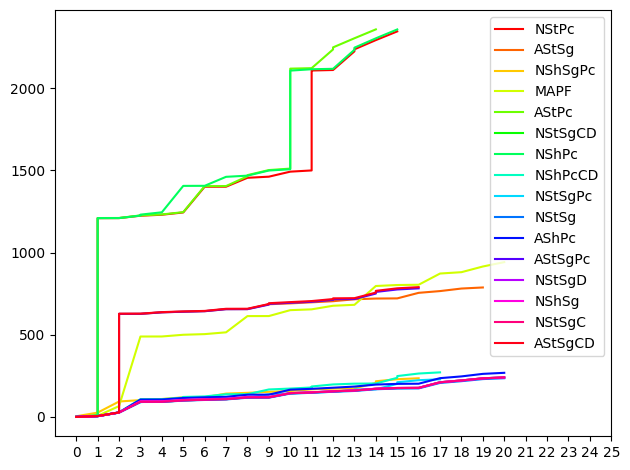

In [589]:


for c,approach in enumerate(cactus.keys()):
    plt.plot(cactus[approach]['x'],cactus[approach]['y'],label=approaches_reference[approach]['name'],color=colors[c])


plt.xticks(range(len(instances)+6))

plt.legend()
plt.tight_layout()
plt.show()





In [590]:
cactus = {}

for approach in approaches:
    cactus[approach] = {'x':[0],'y':[0]}

    
    for instance in instances:
        if not instance in approaches[approach]:
            approaches[approach][instance] = [['time_out', 10*60, 0 , 0, True, "{}"  ]]
    
    current_time = 0
    n_solved = 0

    for instance in instances:
        for step in approaches[approach][instance]:
            if step[0] == 'base_mapf':
                if step[4] == 'True':
                    n_solved +=1
                current_time += float(step[1])
            else: 
                if 'partial_solving_additional_horizon' == step[0]:
                    additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                    
                    if additional_data['nagent'] == additional_data['ngoal_reached']:
                        current_time += float(step[1])
                        n_solved +=1
                        break
                    else:
                        if step == approaches[approach][instance][-1]:
                            current_time += float(step[1])
                else:
                    current_time += float(step[1])
                    if 'partial_solving' == step[0]:
                        additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                        current_time += float(step[1])
                        if additional_data['nagent'] == additional_data['ngoal_reached']:
                            n_solved +=1
                            break
                    
                    
        if current_time < max_time:
            cactus[approach]['x'].append(n_solved)
            cactus[approach]['y'].append(current_time)


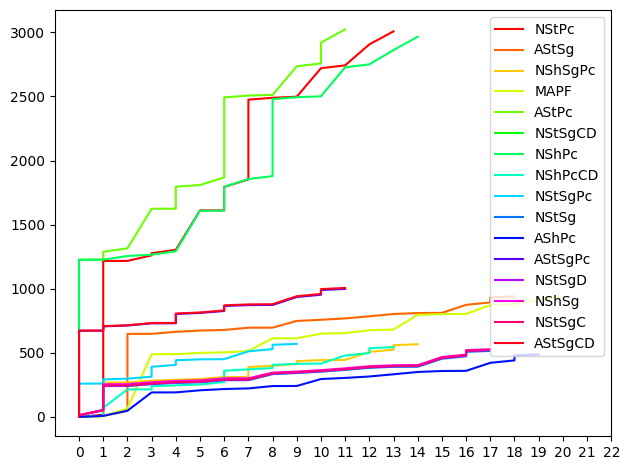

In [591]:
for c,approach in enumerate(cactus.keys()):
    plt.plot(cactus[approach]['x'],cactus[approach]['y'],label=approaches_reference[approach]['name'],color=colors[c])

plt.xticks(range(len(instances)+3))

plt.legend()
plt.tight_layout()
plt.show()

In [592]:
# % Please add the following required packages to your document preamble:
# % \usepackage{booktabs}
# % \usepackage{multirow}
# \begin{table}[]
# \begin{tabular}{@{}llllllllll@{}}
# \toprule
# \multirow{2}{*}{Approach Name} & \multirow{2}{*}{Total Time} & \multirow{2}{*}{\# Solved} & \multicolumn{7}{c}{\% Agent Completed}                                                                                                                                       \\ \cmidrule(l){4-10} 
#                                &                             &                            & \multicolumn{1}{l|}{Horizon} & \multicolumn{1}{c}{0} & \multicolumn{1}{c}{1} & \multicolumn{1}{c}{2} & \multicolumn{1}{c}{3} & \multicolumn{1}{c}{4} & \multicolumn{1}{c}{5} \\ \midrule
#                                &                             &                            &                              &                       &                       &                       &                       &                       &                      
# \end{tabular}
# \end{table}

In [593]:
from wrapper import read, pretty_file_name, solver, mapf, base_ipf, pe_simple_threshold, global_heatmap, partial_solving, select_portion_based_on_heatmap

In [594]:
instances_pool_path = 'instances'
instances_pool = [(pretty_file_name(file), read(path.join(instances_pool_path, file))) for file in os.listdir(
    instances_pool_path) if path.isfile(path.join(instances_pool_path, file))]

npaths = list(range(1,10)) + list(range(10,30,3)) + list(range(30,100,10))
x_na = []
x_a = []

for npath in npaths:
    total_na = 0
    total_a = 0
    print(npath)
    for instance_name, instance_content in instances_pool:
        r,s = base_ipf(instance_content,npaths=npath)
        total_na += s.total_time
        r,s = base_ipf(instance_content,npaths=npath,additional_paths_computation=True)
        total_a += s.total_time
    
    x_a.append(total_a)
    x_na.append(total_na)


plt.plot(npaths,x_na,label="No additional path computation")
plt.plot(npaths,x_a,label="Additional path computation")

    
plt.legend()
plt.tight_layout()
plt.show()
        

1
29
Grounding...


Current agent: 10 - at((12,10),0) => at((21,24),29): 100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


29
Grounding...


Current agent: 10 - at((12,10),0) => at((21,24),29): 100%|██████████| 10/10 [00:00<00:00, 14.71it/s]


28
Grounding...


Current agent: 15 - at((17,7),0) => at((17,10),28): 100%|██████████| 15/15 [00:00<00:00, 34.96it/s]


28
Grounding...


Current agent: 15 - at((17,7),0) => at((17,10),28): 100%|██████████| 15/15 [00:00<00:00, 34.04it/s]


40
Grounding...


Current agent: 20 - at((3,18),0) => at((1,18),4): 100%|██████████| 20/20 [00:00<00:00, 46.13it/s]  


40
Grounding...


Current agent: 20 - at((3,18),0) => at((1,18),6): 100%|██████████| 20/20 [00:00<00:00, 26.76it/s]   


34
Grounding...


Current agent: 15 - at((15,19),0) => at((19,16),34): 100%|██████████| 15/15 [00:00<00:00, 24.78it/s]


34
Grounding...


Current agent: 15 - at((15,19),0) => at((19,16),34): 100%|██████████| 15/15 [00:00<00:00, 20.67it/s]


68
Grounding...


Current agent: 15 - at((1,32),0) => at((5,32),68): 100%|██████████| 15/15 [00:01<00:00,  8.85it/s]  


68
Grounding...


Current agent: 15 - at((1,32),0) => at((5,32),68): 100%|██████████| 15/15 [00:02<00:00,  5.76it/s]  


37
Grounding...


Current agent: 15 - at((47,34),0) => at((19,38),37): 100%|██████████| 15/15 [00:02<00:00,  5.76it/s]


37
Grounding...


Current agent: 15 - at((47,34),0) => at((19,38),37): 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]


38
Grounding...


Current agent: 15 - at((9,18),0) => at((10,17),38): 100%|██████████| 15/15 [00:00<00:00, 44.64it/s]


38
Grounding...


Current agent: 15 - at((9,18),0) => at((10,17),38): 100%|██████████| 15/15 [00:00<00:00, 44.51it/s]


16
Grounding...


Current agent: 5 - at((9,3),0) => at((9,4),16): 100%|██████████| 5/5 [00:00<00:00, 135.15it/s]


16
Grounding...


Current agent: 5 - at((9,3),0) => at((9,4),16): 100%|██████████| 5/5 [00:00<00:00, 123.72it/s]


34
Grounding...


Current agent: 30 - at((28,15),0) => at((29,15),34): 100%|██████████| 30/30 [00:01<00:00, 16.30it/s]


34
Grounding...


Current agent: 30 - at((28,15),0) => at((29,15),34): 100%|██████████| 30/30 [00:02<00:00, 14.35it/s]


45
Grounding...


Current agent: 25 - at((16,15),0) => at((1,18),45): 100%|██████████| 25/25 [00:00<00:00, 42.97it/s] 


45
Grounding...


Current agent: 25 - at((16,15),0) => at((1,18),45): 100%|██████████| 25/25 [00:00<00:00, 39.66it/s] 


59
Grounding...


Current agent: 10 - at((32,47),0) => at((33,1),59): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]


59
Grounding...


Current agent: 10 - at((32,47),0) => at((33,1),59): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


50
Grounding...


Current agent: 5 - at((4,39),0) => at((29,16),50): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s] 


50
Grounding...


Current agent: 5 - at((4,39),0) => at((29,16),50): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s] 


54
Grounding...


Current agent: 35 - at((24,39),0) => at((24,18),54): 100%|██████████| 35/35 [00:05<00:00,  6.57it/s]


54
Grounding...


Current agent: 35 - at((24,39),0) => at((24,18),54): 100%|██████████| 35/35 [00:08<00:00,  4.00it/s]


50
Grounding...


Current agent: 25 - at((10,28),0) => at((24,30),50): 100%|██████████| 25/25 [00:02<00:00, 10.71it/s]


50
Grounding...


Current agent: 25 - at((10,28),0) => at((24,30),50): 100%|██████████| 25/25 [00:02<00:00,  9.92it/s]


30
Grounding...


Current agent: 25 - at((18,19),0) => at((18,17),30): 100%|██████████| 25/25 [00:00<00:00, 37.08it/s]


30
Grounding...


Current agent: 25 - at((18,19),0) => at((18,17),30): 100%|██████████| 25/25 [00:00<00:00, 27.01it/s]


43
Grounding...


Current agent: 15 - at((18,7),0) => at((17,17),43): 100%|██████████| 15/15 [00:00<00:00, 36.76it/s] 


43
Grounding...


Current agent: 15 - at((18,7),0) => at((17,17),43): 100%|██████████| 15/15 [00:00<00:00, 30.26it/s]


14
Grounding...


Current agent: 5 - at((8,10),0) => at((7,1),14): 100%|██████████| 5/5 [00:00<00:00, 101.17it/s]


14
Grounding...


Current agent: 5 - at((8,10),0) => at((7,1),14): 100%|██████████| 5/5 [00:00<00:00, 66.38it/s]


26
Grounding...


Current agent: 20 - at((29,14),0) => at((29,17),26): 100%|██████████| 20/20 [00:01<00:00, 17.82it/s]


26
Grounding...


Current agent: 20 - at((29,14),0) => at((29,17),26): 100%|██████████| 20/20 [00:01<00:00, 16.48it/s]


98
Grounding...


Current agent: 20 - at((13,22),0) => at((15,22),98): 100%|██████████| 20/20 [00:01<00:00, 10.91it/s]


98
Grounding...


Current agent: 20 - at((13,22),0) => at((15,22),98): 100%|██████████| 20/20 [00:02<00:00,  6.67it/s]


25
Grounding...


Current agent: 5 - at((15,2),0) => at((10,6),25): 100%|██████████| 5/5 [00:00<00:00, 25.14it/s]


25
Grounding...


Current agent: 5 - at((15,2),0) => at((10,6),25): 100%|██████████| 5/5 [00:00<00:00, 20.61it/s]


2
29
Grounding...


Current agent: 10 - at((12,10),0) => at((21,24),29): 100%|██████████| 10/10 [00:00<00:00, 14.76it/s]


29
Grounding...


Current agent: 10 - at((12,10),0) => at((21,24),29): 100%|██████████| 10/10 [00:00<00:00, 14.93it/s]


28
Grounding...


Current agent: 15 - at((17,7),0) => at((17,10),28): 100%|██████████| 15/15 [00:00<00:00, 35.07it/s]


28
Grounding...


Current agent: 15 - at((17,7),0) => at((17,10),28): 100%|██████████| 15/15 [00:00<00:00, 28.05it/s]


40
Grounding...


Current agent: 20 - at((3,18),0) => at((1,18),4): 100%|██████████| 20/20 [00:00<00:00, 47.30it/s]  


40
Grounding...


Current agent: 20 - at((3,18),0) => at((1,18),6): 100%|██████████| 20/20 [00:00<00:00, 24.83it/s]   


34
Grounding...


Current agent: 15 - at((15,19),0) => at((19,16),34): 100%|██████████| 15/15 [00:00<00:00, 28.52it/s]


34
Grounding...


Current agent: 15 - at((15,19),0) => at((19,16),34): 100%|██████████| 15/15 [00:00<00:00, 18.90it/s]


68
Grounding...


Current agent: 15 - at((1,32),0) => at((5,32),68): 100%|██████████| 15/15 [00:01<00:00,  8.79it/s]  


68
Grounding...


Current agent: 15 - at((1,32),0) => at((5,32),68): 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]  


37
Grounding...


Current agent: 15 - at((47,34),0) => at((19,38),37): 100%|██████████| 15/15 [00:02<00:00,  5.54it/s]


37
Grounding...


Current agent: 15 - at((47,34),0) => at((19,38),37): 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]


38
Grounding...


Current agent: 15 - at((9,18),0) => at((10,17),38): 100%|██████████| 15/15 [00:00<00:00, 41.86it/s]


38
Grounding...


Current agent: 15 - at((9,18),0) => at((10,17),38): 100%|██████████| 15/15 [00:00<00:00, 41.25it/s]


16
Grounding...


Current agent: 5 - at((9,3),0) => at((9,4),16): 100%|██████████| 5/5 [00:00<00:00, 143.79it/s]


16
Grounding...


Current agent: 5 - at((9,3),0) => at((9,4),16): 100%|██████████| 5/5 [00:00<00:00, 100.76it/s]


34
Grounding...


Current agent: 30 - at((28,15),0) => at((29,15),34): 100%|██████████| 30/30 [00:01<00:00, 16.13it/s]


34
Grounding...


Current agent: 30 - at((28,15),0) => at((29,15),34): 100%|██████████| 30/30 [00:02<00:00, 14.46it/s]


45
Grounding...


Current agent: 25 - at((16,15),0) => at((1,18),45): 100%|██████████| 25/25 [00:00<00:00, 36.26it/s] 


45
Grounding...


Current agent: 25 - at((16,15),0) => at((1,18),45): 100%|██████████| 25/25 [00:00<00:00, 36.09it/s] 


59
Grounding...


Current agent: 10 - at((32,47),0) => at((33,1),59): 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]


59
Grounding...


Current agent: 10 - at((32,47),0) => at((33,1),59): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


50
Grounding...


Current agent: 5 - at((4,39),0) => at((29,16),50): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s] 


50
Grounding...


Current agent: 5 - at((4,39),0) => at((29,16),50): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s] 


54
Grounding...


Current agent: 35 - at((24,39),0) => at((24,18),54): 100%|██████████| 35/35 [00:05<00:00,  6.33it/s]


54
Grounding...


Current agent: 35 - at((24,39),0) => at((24,18),54): 100%|██████████| 35/35 [00:09<00:00,  3.68it/s]


50
Grounding...


Current agent: 25 - at((10,28),0) => at((24,30),50): 100%|██████████| 25/25 [00:02<00:00, 10.43it/s]


50
Grounding...


Current agent: 25 - at((10,28),0) => at((24,30),50): 100%|██████████| 25/25 [00:02<00:00, 10.18it/s]


30
Grounding...


Current agent: 25 - at((18,19),0) => at((18,17),30): 100%|██████████| 25/25 [00:00<00:00, 35.35it/s]


30
Grounding...


Current agent: 25 - at((18,19),0) => at((18,17),30): 100%|██████████| 25/25 [00:00<00:00, 26.55it/s]


43
Grounding...


Current agent: 15 - at((18,7),0) => at((17,17),43): 100%|██████████| 15/15 [00:00<00:00, 37.27it/s] 


43
Grounding...


Current agent: 15 - at((18,7),0) => at((17,17),43): 100%|██████████| 15/15 [00:00<00:00, 27.24it/s] 


14
Grounding...


Current agent: 5 - at((8,10),0) => at((7,1),14): 100%|██████████| 5/5 [00:00<00:00, 82.15it/s]


14
Grounding...


Current agent: 5 - at((8,10),0) => at((7,1),14): 100%|██████████| 5/5 [00:00<00:00, 89.58it/s]


26
Grounding...


Current agent: 20 - at((29,14),0) => at((29,17),26): 100%|██████████| 20/20 [00:01<00:00, 18.94it/s]


26
Grounding...


Current agent: 20 - at((29,14),0) => at((29,17),26): 100%|██████████| 20/20 [00:01<00:00, 17.32it/s]


98
Grounding...


Current agent: 20 - at((13,22),0) => at((15,22),98): 100%|██████████| 20/20 [00:01<00:00, 11.26it/s]


98
Grounding...


Current agent: 20 - at((13,22),0) => at((15,22),98): 100%|██████████| 20/20 [00:03<00:00,  6.32it/s]


25
Grounding...


Current agent: 5 - at((15,2),0) => at((10,6),25): 100%|██████████| 5/5 [00:00<00:00, 19.29it/s]


25
Grounding...


Current agent: 5 - at((15,2),0) => at((10,6),25): 100%|██████████| 5/5 [00:00<00:00, 18.59it/s]


3
29
Grounding...


Current agent: 10 - at((12,10),0) => at((21,24),29): 100%|██████████| 10/10 [00:00<00:00, 11.95it/s]


29
Grounding...


Current agent: 10 - at((12,10),0) => at((21,24),29): 100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


28
Grounding...


Current agent: 15 - at((17,7),0) => at((17,10),28): 100%|██████████| 15/15 [00:00<00:00, 28.96it/s]


28
Grounding...


Current agent: 15 - at((17,7),0) => at((17,10),28): 100%|██████████| 15/15 [00:00<00:00, 27.87it/s]


40
Grounding...


Current agent: 20 - at((3,18),0) => at((1,18),4): 100%|██████████| 20/20 [00:00<00:00, 33.90it/s]   


40
Grounding...


Current agent: 20 - at((3,18),0) => at((1,18),6): 100%|██████████| 20/20 [00:01<00:00, 19.59it/s]   


34
Grounding...


Current agent: 15 - at((15,19),0) => at((19,16),34): 100%|██████████| 15/15 [00:00<00:00, 23.43it/s]


34
Grounding...


Current agent: 15 - at((15,19),0) => at((19,16),34): 100%|██████████| 15/15 [00:00<00:00, 18.79it/s]


68
Grounding...


Current agent: 1 - at((27,6),0) => at((37,6),38):   0%|          | 0/15 [00:00<?, ?it/s]


KeyboardInterrupt: 

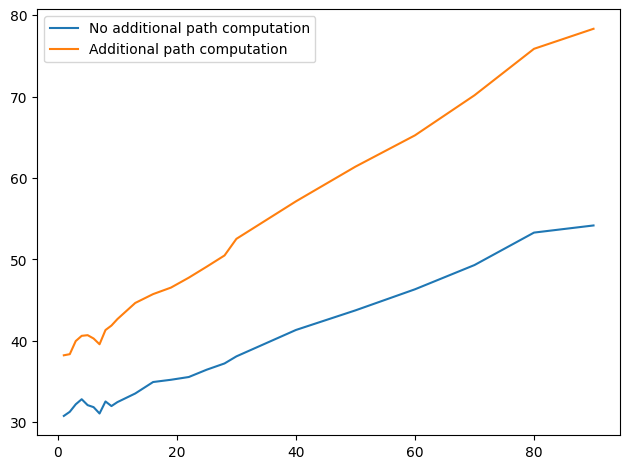

In [ ]:
plt.plot(npaths,x_na,label="No additional path computation")
plt.plot(npaths,x_a,label="Additional path computation")

    
plt.legend()
plt.tight_layout()
plt.show()
        